In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
import pickle
import random
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    print("Name:", gpu.name, "  Type:", gpu.device_type)

Name: /physical_device:GPU:0   Type: GPU


In [3]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [4]:
Dataset="dataset"
Data_Dir=os.listdir(Dataset)
print(Data_Dir)

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']


In [5]:
images = []
classNo = []
classes = len(Data_Dir)
epochs_val = 25
batch_size = 32
imageDimensions = (64,224,3)

In [6]:
for cls in range(classes):
    path = os.path.join(Dataset,str(cls))
    img = os.listdir(path)

    for im in img:
        try:
            image = Image.open(path + '/'+ im)
            image = image.resize((64,224))
            image = np.array(image)
            
            images.append(image)
            classNo.append(cls)
        except:
            print("Error loading image")

In [7]:
images = np.array(images)
classNo = np.array(classNo)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=0.2, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4320, 224, 64) (1080, 224, 64) (4320,) (1080,)


In [9]:
# def grayscale(img):
#     img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#     return img
# def equalize(img):
#     img = cv2.equalizeHist(img)
#     return img
# def preprocessing(img):
#     img = grayscale(img)
#     img = equalize(img)
#     img = img/255
#     return img

# X_train = np.array(list(map(preprocessing,X_train)))
# X_test = np.array(list(map(preprocessing,X_test)))

In [10]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

In [11]:
y_train = to_categorical(y_train, classes)
y_test = to_categorical(y_test, classes)

In [12]:
y_train.shape

(4320, 100)

In [13]:
def myModel():
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(imageDimensions[1],imageDimensions[0],1)))
    model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.25))

    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.25))
    
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.25))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(classes, activation='softmax'))

    #Compilation of the model
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    return model

In [14]:
model = myModel()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 60, 32)       832       
                                                                 
 conv2d_1 (Conv2D)           (None, 216, 56, 32)       25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 108, 28, 32)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 108, 28, 32)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 106, 26, 64)       18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 104, 24, 64)       36928     
                                                        

In [15]:
history = model.fit(X_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=epochs_val, 
                    validation_data=(X_test, y_test))


Epoch 1/25
135/135 [==============================] - 9s 30ms/step - loss: 5.0436 - accuracy: 0.0238 - val_loss: 4.0998 - val_accuracy: 0.1269
Epoch 2/25
135/135 [==============================] - 4s 27ms/step - loss: 3.5059 - accuracy: 0.1998 - val_loss: 2.5311 - val_accuracy: 0.4296
Epoch 3/25
135/135 [==============================] - 4s 27ms/step - loss: 2.3184 - accuracy: 0.4255 - val_loss: 1.4806 - val_accuracy: 0.6796
Epoch 4/25
135/135 [==============================] - 4s 27ms/step - loss: 1.6304 - accuracy: 0.5769 - val_loss: 1.0818 - val_accuracy: 0.7620
Epoch 5/25
135/135 [==============================] - 4s 27ms/step - loss: 1.1579 - accuracy: 0.6882 - val_loss: 0.7724 - val_accuracy: 0.8204
Epoch 6/25
135/135 [==============================] - 4s 27ms/step - loss: 0.9376 - accuracy: 0.7442 - val_loss: 0.6986 - val_accuracy: 0.8306
Epoch 7/25
135/135 [==============================] - 4s 26ms/step - loss: 0.7533 - accuracy: 0.7856 - val_loss: 0.6588 - val_accuracy: 0.8435

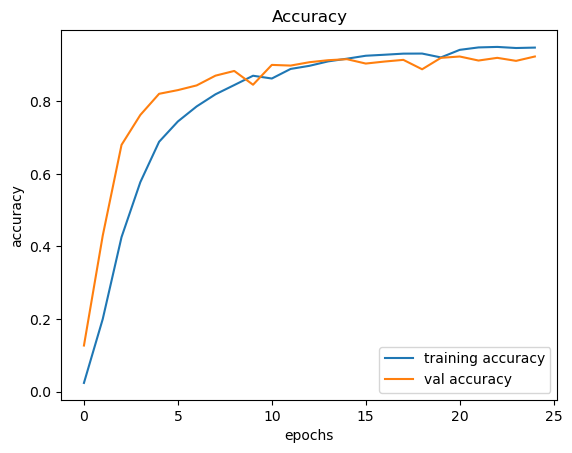

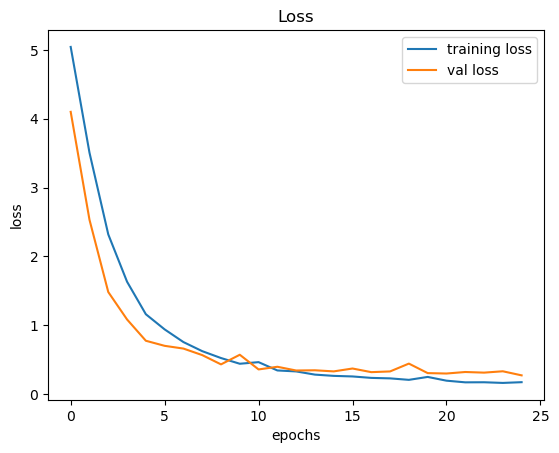

In [16]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [17]:
score = model.evaluate(X_train, y_train, verbose=0)
print('Train accuracy:', score[1])

Train accuracy: 1.0


In [18]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.9231481552124023


In [19]:
pred = np.argmax(model.predict(X_test), axis = 1)

34/34 [==============================] - 0s 5ms/step


In [20]:
actual=np.argmax(y_test, axis = 1)

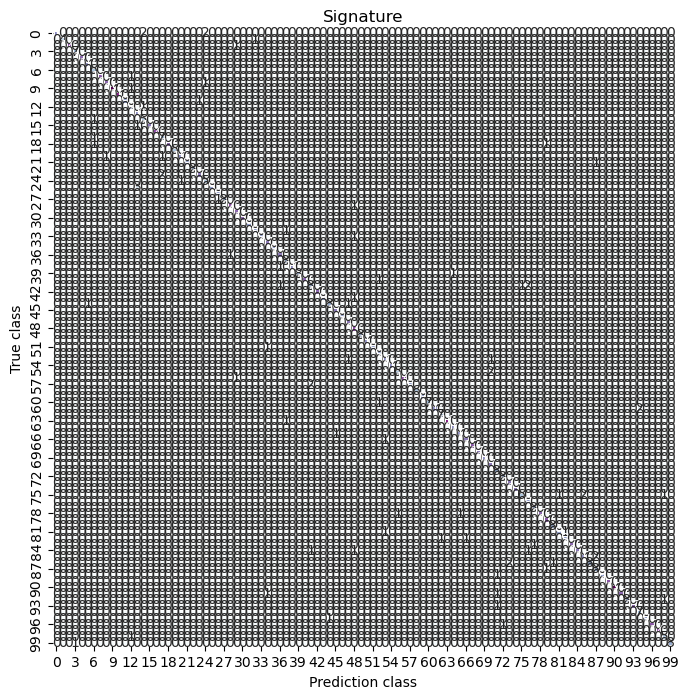

In [21]:
cm = confusion_matrix(actual, pred)
# cm_df = pd.DataFrame(cm)

plt.figure(figsize = (8,8))
sns.heatmap(cm, annot = True,cmap='BuPu',cbar=False,linewidth=2,fmt='d')
plt.title('Signature')
plt.ylabel('True class')
plt.xlabel('Prediction class')
plt.show()

In [22]:
cf = classification_report(actual, pred)
print(cf)

              precision    recall  f1-score   support

           0       1.00      0.71      0.83        14
           1       1.00      0.80      0.89         5
           2       1.00      0.93      0.97        15
           3       0.88      1.00      0.93         7
           4       1.00      1.00      1.00        12
           5       0.91      1.00      0.95        10
           6       0.67      1.00      0.80         6
           7       1.00      0.93      0.96        14
           8       0.92      0.92      0.92        13
           9       1.00      0.95      0.97        20
          10       1.00      1.00      1.00        16
          11       1.00      0.90      0.95        10
          12       0.75      0.90      0.82        10
          13       0.71      1.00      0.83        10
          14       0.62      0.83      0.71         6
          15       1.00      0.92      0.96        12
          16       1.00      1.00      1.00        14
          17       0.70    